# Rainbowgrams

In [4]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sr = 22050 # sample rate
y = librosa.chirp(fmin = 32, fmax = 32 * 2 ** 5, sr = sr, duration = 10, linear = True)
D = librosa.stft(y)
mag, phase = librosa.magphase(D)

In [6]:
f = librosa.fft_frequencies()
times = librosa.times_like(D)

phase_exp = 2 * np.pi * np.multiply.outer(f, times)

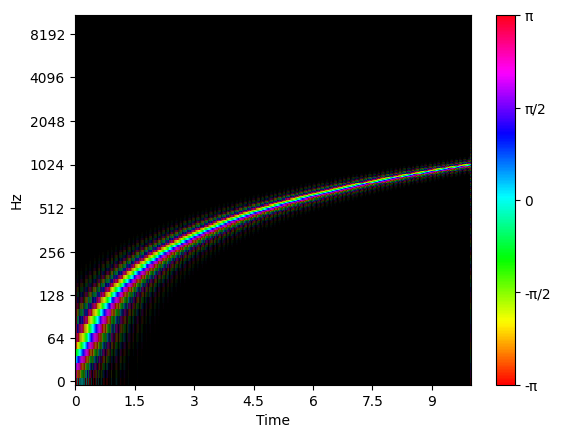

In [7]:
fig, ax = plt.subplots()
img = librosa.display.specshow(np.diff(np.unwrap(np.angle(phase) - phase_exp, axis = 1), axis = 1, prepend = 0),
                               cmap = 'hsv',
                               alpha = librosa.amplitude_to_db(mag, ref = np.max) / 80 + 1,
                               ax = ax,
                               y_axis = 'log',
                               x_axis = 'time')
ax.set_facecolor('#000')
cbar = fig.colorbar(img, ticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
cbar.ax.set(yticklabels = ['-π', '-π/2', "0", 'π/2', 'π'])
plt.show()